In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow as tf


In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426001
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838226


In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3022.000000,3022.000000,3022.000000,3022.000000,3.022000e+03,3022.000000
mean,43.130897,42.249202,42.686418,42.709082,2.702862e+08,40.809305
std,38.497269,37.620704,38.046962,38.083488,2.259193e+08,38.439124
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07,5.856372
25%,18.649375,18.316429,18.507232,18.536429,1.096525e+08,16.161471
50%,28.550000,27.980000,28.263750,28.262501,1.842352e+08,25.993132
75%,48.598751,47.781249,48.072499,48.175001,3.707304e+08,46.453844
max,182.130005,178.529999,181.119995,180.330002,1.880998e+09,179.586868


In [5]:
df=df.reset_index()


In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426001
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


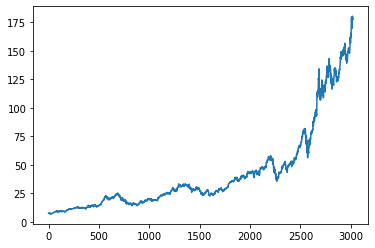

In [8]:
plt.plot(df.Close)

In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

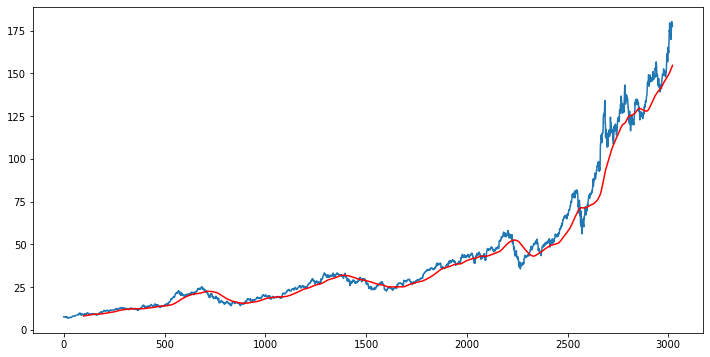

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

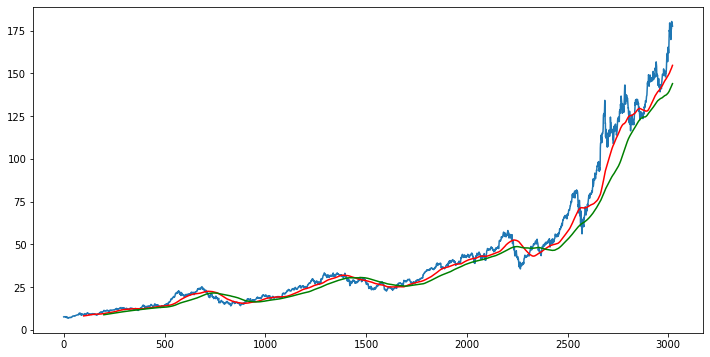

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [13]:
df.shape

(3022, 5)

In [14]:
#spliting data into training and testing
data_training =pd.DataFrame (df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)
                              


(2115, 1)
(907, 1)


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [18]:
data_training_array.shape


(2115, 1)

In [19]:
x_train =[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    

In [20]:
#ml model from keras import distribute

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [21]:
model =Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
          input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences= True,))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences= True,))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu',))
model.add(Dropout(0.5))


model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 33s 360ms/step - loss: 0.0362
Epoch 2/50
63/63 [==============================] - 21s 332ms/step - loss: 0.0069
Epoch 3/50
63/63 [==============================] - 22s 345ms/step - loss: 0.0061
Epoch 4/50
63/63 [==============================] - 23s 363ms/step - loss: 0.0059
Epoch 5/50
63/63 [==============================] - 19s 295ms/step - loss: 0.0057
Epoch 6/50
63/63 [==============================] - 20s 321ms/step - loss: 0.0055
Epoch 7/50
63/63 [==============================] - 21s 336ms/step - loss: 0.0054
Epoch 8/50
63/63 [==============================] - 23s 364ms/step - loss: 0.0048
Epoch 9/50
63/63 [==============================] - 21s 341ms/step - loss: 0.0049
Epoch 10/50
63/63 [==============================] - 22s 344ms/step - loss: 0.0049
Epoch 11/50
63/63 [==============================] - 21s 332ms/step - loss: 0.0043
Epoch 12/50
63/63 [==============================] - 21s 332ms/step - loss: 0.0044
Epoch 13/50
6

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [25]:
data_testing.tail(100)

,Close
2922,145.860001
2923,148.889999
2924,149.100006
2925,151.119995
2926,150.190002
...,...
3017,180.330002
3018,179.289993
3019,179.380005
3020,178.199997


In [26]:
past_100_days=data_training.tail(100)

final_df = past_100_days.append(data_testing, ignore_index = True)

final_df.head()

C:\Users\VASIM\AppData\Local\Temp\ipykernel_16768\247031261.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [28]:
input_data.shape

(1007, 1)

In [29]:
#Checking Predicted VS Originalvalues

In [30]:
x_test=[]
y_test=[]

    
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [31]:
#making prediction 

y_predicted = model.predict(x_test)

29/29 [==============================] - 2s 61ms/step


In [32]:
y_predicted.shape

(907, 1)

In [33]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [34]:
y_predicted

array([[0.13416912],
       [0.13476416],
       [0.13528708],
       [0.13573964],
       [0.13614154],
       [0.1365241 ],
       [0.13692033],
       [0.13735697],
       [0.1378447 ],
       [0.13837147],
       [0.1389139 ],
       [0.13945374],
       [0.13996792],
       [0.14043622],
       [0.14083503],
       [0.14114642],
       [0.14134724],
       [0.14142735],
       [0.14138535],
       [0.14122628],
       [0.14094982],
       [0.14057344],
       [0.14012331],
       [0.13963404],
       [0.13913707],
       [0.1386677 ],
       [0.13823721],
       [0.13785231],
       [0.13753161],
       [0.13730344],
       [0.13718602],
       [0.13716975],
       [0.13724956],
       [0.13742146],
       [0.13767228],
       [0.13798712],
       [0.13834414],
       [0.13872826],
       [0.13912585],
       [0.13952464],
       [0.1399225 ],
       [0.14032975],
       [0.14075248],
       [0.14117217],
       [0.14155975],
       [0.14189321],
       [0.1422247 ],
       [0.142

In [35]:
scaler.scale_

array([0.00690691])

In [36]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

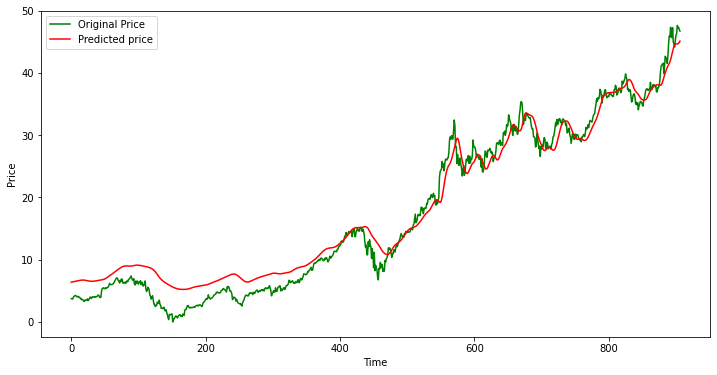

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label ='Original Price') 
plt.plot(y_predicted,'r',label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()